In [124]:
import warnings; warnings.simplefilter('ignore')

# Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that output variable (y) can be calculated from a linear combination of the input variables (x).

# Univariate Linear Regression is a linear regression that has only one input parameter and one output label.

# consider the following regression problem:
# estimate how happiness is influenced by gross domestic product (GDP) per capita. Use 2017 data from ![here](https://www.kaggle.com/unsdsn/world-happiness#2017.csv) 

# load data and consider a single feature (Economy..GDP.per.capita) and the output to be estimated (happiness)
import csv

def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
# print('in:  ', inputs[:5])
# print('out: ', outputs[:5])

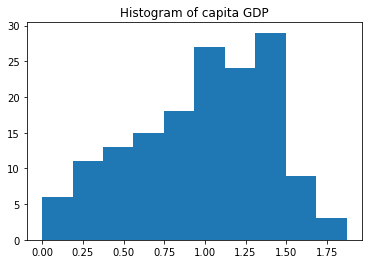

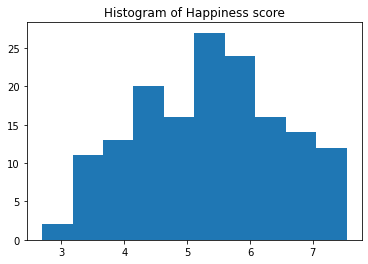

In [125]:
# see how the data looks (plot the histograms associated to input data - GDP feature - and output data - happiness)

import matplotlib.pyplot as plt 

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, "capita GDP")
plotDataHistogram(outputs, "Happiness score")

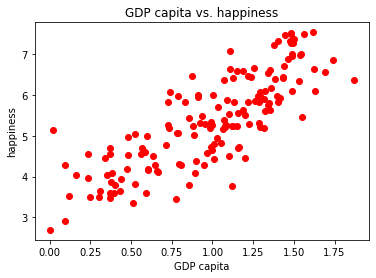

In [126]:
# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)

plt.plot(inputs, outputs, 'ro') 
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()

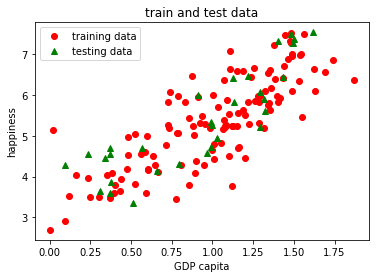

In [127]:
import numpy as np 

# Split the Data Into Training and Test Subsets
# In this step we will split our dataset into training and testing subsets (in proportion 80/20%).

# Training data set is used for training the linear model. Testing dataset is used for validating of the model. All data from testing dataset will be new to  model and we may check how accurate are model predictions.

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
plt.plot(testInputs, testOutputs, 'g^', label = 'testing data')     #test data are plotted by green and a triangle sign
plt.title('train and test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [128]:
import random
class MyBGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    # simple batch GD
    def fit(self, x_all, y_all, learningRate = 0.01, noEpochs = 10000, batchSize = 10):

        indexes = random.sample(range(0,len(x_all)), batchSize)
        x = [x_all[i] for i in indexes]
        y = [y_all[i] for i in indexes]

        num_features = len(x[0])
        num_samples = len(x)

        self.coef_ = [0.0 for _ in range(num_features)]  # w coefficients w1, w2, ...

        for epoch in range(noEpochs):
            ycomputed = []
            for i in range(num_samples):
                ycomputed.append(self.eval(x[i]))  # estimate all the outputs
            for j in range(len(self.coef_)):  # for each coefficient (w)
                crtError = 0
                for i in range(num_samples):
                    crtError += (ycomputed[i] - y[i]) * x[i][j]  # calculate the sum (sum ((computed - real) * feat[j]) )
                crtError = crtError / num_samples  # divide by number of samples
                self.coef_[j] = self.coef_[j] - learningRate * crtError  # update the coefficient
            # calculate the intercept (w0) for the whole batch:
            crtError0 = 0
            for i in range(num_samples):
                crtError0 += (ycomputed[i] - y[i]) * 1
            crtError0 = crtError0 * 1 / num_samples

            self.intercept_ = self.intercept_ - learningRate * crtError0

    def eval(self, xi):
        yi = self.intercept_
        for j in range(len(xi)):
            yi += self.coef_[j] * xi[j]
        return yi 

    def predict(self, x):
        yComputed = [self.eval(xi) for xi in x]
        return yComputed

In [129]:
# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x
# Prediction step: used the trained model to estimate the output for a new input


# training data preparation (the sklearn linear model requires as input training data as noSamples x noFeatures array; in the current case, the input must be a matrix of len(trainInputs) lineas and one columns (a single feature is used in this problem))
xx = [[el] for el in trainInputs]

# using developed code

# model initialisation
regressor = MyBGDRegression()
# training the model by using the training inputs and known training outputs
regressor.fit(xx, trainOutputs)
# save the model parameters
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  3.3074874472472704  +  2.333246287103533  * x


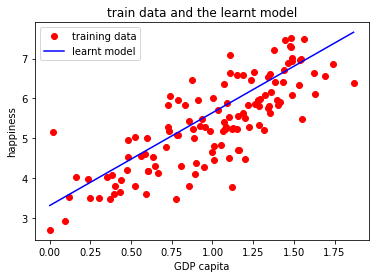

In [130]:
# plot the learnt model
# prepare some synthetic data (inputs are random, while the outputs are computed by the learnt model)
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

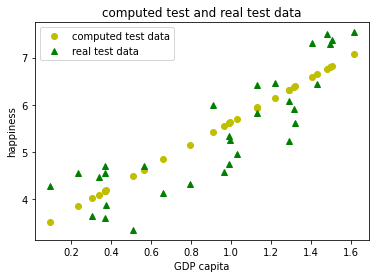

In [131]:
# use the trained model to predict new inputs

# makes predictions for test data (manual)
# computedTestOutputs = [w0 + w1 * el for el in testInputs]
# makes predictions for test data (by tool)
computedTestOutputs = regressor.predict([[x] for x in testInputs])

# plot the computed outputs (see how far they are from the real outputs)
plt.plot(testInputs, computedTestOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(testInputs, testOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed test and real test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [132]:
#compute the differences between the predictions and real outputs
# "manual" computation
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)


prediction error (manual):  0.38294304633348564
